In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the Datasets

In [29]:
index_names = ['engine','cycle']
setting_names = ['setting_1','setting_2','setting_3']
sensor_names = ['s_{}'.format(i) for i in range(1,22)]
col_names = index_names + setting_names + sensor_names

In [30]:
train = pd.read_csv(r"C:\Users\HP\Desktop\_\Machine Learning\Predictive Maintanance System\data\CMAPSSData\train_FD001.txt", sep='\s+',header=None,names=col_names)
test = pd.read_csv(r"C:\Users\HP\Desktop\_\Machine Learning\Predictive Maintanance System\data\CMAPSSData\test_FD001.txt", sep='\s+',header=None,names=col_names)
y_test = pd.read_csv(r"C:\Users\HP\Desktop\_\Machine Learning\Predictive Maintanance System\data\CMAPSSData\RUL_FD001.txt", sep='\s+',header=None,names=['RUL'])

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
C:\Users\HP\AppData\Local\Temp\ipykernel_10316\1789771214.py:1: SyntaxWarning: invalid escape sequence '\s'
  train = pd.read_csv(r"C:\Users\HP\Desktop\_\Machine Learning\Predictive Maintanance System\data\CMAPSSData\train_FD001.txt", sep='\s+',header=None,names=col_names)
C:\Users\HP\AppData\Local\Temp\ipykernel_10316\1789771214.py:2: SyntaxWarning: invalid escape sequence '\s'
  test = pd.read_csv(r"C:\Users\HP\Desktop\_\Machine Learning\Predictive Maintanance System\data\CMAPSSData\test_FD001.txt", sep='\s+',header=None,names=col_names)
C:\Users\HP\AppData\Local\Temp\ipykernel_10316\1789771214.py:3: SyntaxWarning: invalid escape sequence '\s'
  y_test = pd.read_csv(r"C:\Users\HP\Desktop\_

In [31]:
train

engine  cycle  setting_1  setting_2  setting_3     s_1     s_2  \
0           1      1    -0.0007    -0.0004      100.0  518.67  641.82   
1           1      2     0.0019    -0.0003      100.0  518.67  642.15   
2           1      3    -0.0043     0.0003      100.0  518.67  642.35   
3           1      4     0.0007     0.0000      100.0  518.67  642.35   
4           1      5    -0.0019    -0.0002      100.0  518.67  642.37   
...       ...    ...        ...        ...        ...     ...     ...   
20626     100    196    -0.0004    -0.0003      100.0  518.67  643.49   
20627     100    197    -0.0016    -0.0005      100.0  518.67  643.54   
20628     100    198     0.0004     0.0000      100.0  518.67  643.42   
20629     100    199    -0.0011     0.0003      100.0  518.67  643.23   
20630     100    200    -0.0032    -0.0005      100.0  518.67  643.85   

           s_3      s_4    s_5  ...    s_12     s_13     s_14    s_15  s_16  \
0      1589.70  1400.60  14.62  ...  521.66  2388.02  8138.62  8.4195  0.03   
1      1591.82  1403.14  14.62  ...  522.28  2388.07  8131.49  8.4318  0.03   
2      1587.99  1404.20  14.62  ...  522.42  2388.03  8133.23  8.4178  0.03   
3      1582.79  1401.87  14.62  ...  522.86  2388.08  8133.83  8.3682  0.03   
4      1582.85  1406.22  14.62  ...  522.19  2388.04  8133.80  8.4294  0.03   
...        ...      ...    ...  ...     ...      ...      ...     ...   ...   
20626  1597.98  1428.63  14.62  ...  519.49  2388.26  8137.60  8.4956  0.03   
20627  1604.50  1433.58  14.62  ...  519.68  2388.22  8136.50  8.5139  0.03   
20628  1602.46  1428.18  14.62  ...  520.01  2388.24  8141.05  8.5646  0.03   
20629  1605.26  1426.53  14.62  ...  519.67  2388.23  8139.29  8.5389  0.03   
20630  1600.38  1432.14  14.62  ...  519.30  2388.26  8137.33  8.5036  0.03   

       s_17  s_18   s_19   s_20     s_21  
0       392  2388  100.0  39.06  23.4190  
1       392  2388  100.0  39.00  23.4236  
2       390  2388  100.0  38.95  23.3442  
3       392  2388  100.0  38.88  23.3739  
4       393  2388  100.0  38.90  23.4044  
...     ...   ...    ...    ...      ...  
20626   397  2388  100.0  38.49  22.9735  
20627   395  2388  100.0  38.30  23.1594  
20628   398  2388  100.0  38.44  22.9333  
20629   395  2388  100.0  38.29  23.0640  
20630   396  2388  100.0  38.37  23.0522  

[20631 rows x 26 columns]

In [32]:
test

engine  cycle  setting_1  setting_2  setting_3     s_1     s_2  \
0           1      1     0.0023     0.0003      100.0  518.67  643.02   
1           1      2    -0.0027    -0.0003      100.0  518.67  641.71   
2           1      3     0.0003     0.0001      100.0  518.67  642.46   
3           1      4     0.0042     0.0000      100.0  518.67  642.44   
4           1      5     0.0014     0.0000      100.0  518.67  642.51   
...       ...    ...        ...        ...        ...     ...     ...   
13091     100    194     0.0049     0.0000      100.0  518.67  643.24   
13092     100    195    -0.0011    -0.0001      100.0  518.67  643.22   
13093     100    196    -0.0006    -0.0003      100.0  518.67  643.44   
13094     100    197    -0.0038     0.0001      100.0  518.67  643.26   
13095     100    198     0.0013     0.0003      100.0  518.67  642.95   

           s_3      s_4    s_5  ...    s_12     s_13     s_14    s_15  s_16  \
0      1585.29  1398.21  14.62  ...  521.72  2388.03  8125.55  8.4052  0.03   
1      1588.45  1395.42  14.62  ...  522.16  2388.06  8139.62  8.3803  0.03   
2      1586.94  1401.34  14.62  ...  521.97  2388.03  8130.10  8.4441  0.03   
3      1584.12  1406.42  14.62  ...  521.38  2388.05  8132.90  8.3917  0.03   
4      1587.19  1401.92  14.62  ...  522.15  2388.03  8129.54  8.4031  0.03   
...        ...      ...    ...  ...     ...      ...      ...     ...   ...   
13091  1599.45  1415.79  14.62  ...  520.69  2388.00  8213.28  8.4715  0.03   
13092  1595.69  1422.05  14.62  ...  521.05  2388.09  8210.85  8.4512  0.03   
13093  1593.15  1406.82  14.62  ...  521.18  2388.04  8217.24  8.4569  0.03   
13094  1594.99  1419.36  14.62  ...  521.33  2388.08  8220.48  8.4711  0.03   
13095  1601.62  1424.99  14.62  ...  521.07  2388.05  8214.64  8.4903  0.03   

       s_17  s_18   s_19   s_20     s_21  
0       392  2388  100.0  38.86  23.3735  
1       393  2388  100.0  39.02  23.3916  
2       393  2388  100.0  39.08  23.4166  
3       391  2388  100.0  39.00  23.3737  
4       390  2388  100.0  38.99  23.4130  
...     ...   ...    ...    ...      ...  
13091   394  2388  100.0  38.65  23.1974  
13092   395  2388  100.0  38.57  23.2771  
13093   395  2388  100.0  38.62  23.2051  
13094   395  2388  100.0  38.66  23.2699  
13095   396  2388  100.0  38.70  23.1855  

[13096 rows x 26 columns]

In [33]:
# Since the true RUL values (y_test) for the test set are only provided for the last time cycle of each enginge, 
# the test set is subsetted to represent the same
test = test.groupby('engine').last().reset_index().drop(['engine','cycle'], axis=1)
test.shape

(100, 24)

In [34]:
y_test

RUL
0   112
1    98
2    69
3    82
4    91
..  ...
95  137
96   82
97   59
98  117
99   20

[100 rows x 1 columns]

## Data Preprocessing

In [35]:
train.describe()

engine         cycle     setting_1     setting_2  setting_3  \
count  20631.000000  20631.000000  20631.000000  20631.000000    20631.0   
mean      51.506568    108.807862     -0.000009      0.000002      100.0   
std       29.227633     68.880990      0.002187      0.000293        0.0   
min        1.000000      1.000000     -0.008700     -0.000600      100.0   
25%       26.000000     52.000000     -0.001500     -0.000200      100.0   
50%       52.000000    104.000000      0.000000      0.000000      100.0   
75%       77.000000    156.000000      0.001500      0.000300      100.0   
max      100.000000    362.000000      0.008700      0.000600      100.0   

            s_1           s_2           s_3           s_4           s_5  ...  \
count  20631.00  20631.000000  20631.000000  20631.000000  2.063100e+04  ...   
mean     518.67    642.680934   1590.523119   1408.933782  1.462000e+01  ...   
std        0.00      0.500053      6.131150      9.000605  1.776400e-15  ...   
min      518.67    641.210000   1571.040000   1382.250000  1.462000e+01  ...   
25%      518.67    642.325000   1586.260000   1402.360000  1.462000e+01  ...   
50%      518.67    642.640000   1590.100000   1408.040000  1.462000e+01  ...   
75%      518.67    643.000000   1594.380000   1414.555000  1.462000e+01  ...   
max      518.67    644.530000   1616.910000   1441.490000  1.462000e+01  ...   

               s_12          s_13          s_14          s_15          s_16  \
count  20631.000000  20631.000000  20631.000000  20631.000000  2.063100e+04   
mean     521.413470   2388.096152   8143.752722      8.442146  3.000000e-02   
std        0.737553      0.071919     19.076176      0.037505  1.387812e-17   
min      518.690000   2387.880000   8099.940000      8.324900  3.000000e-02   
25%      520.960000   2388.040000   8133.245000      8.414900  3.000000e-02   
50%      521.480000   2388.090000   8140.540000      8.438900  3.000000e-02   
75%      521.950000   2388.140000   8148.310000      8.465600  3.000000e-02   
max      523.380000   2388.560000   8293.720000      8.584800  3.000000e-02   

               s_17     s_18     s_19          s_20          s_21  
count  20631.000000  20631.0  20631.0  20631.000000  20631.000000  
mean     393.210654   2388.0    100.0     38.816271     23.289705  
std        1.548763      0.0      0.0      0.180746      0.108251  
min      388.000000   2388.0    100.0     38.140000     22.894200  
25%      392.000000   2388.0    100.0     38.700000     23.221800  
50%      393.000000   2388.0    100.0     38.830000     23.297900  
75%      394.000000   2388.0    100.0     38.950000     23.366800  
max      400.000000   2388.0    100.0     39.430000     23.618400  

[8 rows x 26 columns]

In [36]:
# We can remove setting_3 column as we can see that it’s value is not changing therefore will not not add any information to our prediction.
train = train.drop('setting_3',axis=1)

In [37]:
'''
Now we will calculated and add RUL(Remaining Useful Life) to the train dataset.

RUL = Max Life Time Cycle of Engine-Current Time Cycle
'''
def add_remaining_useful_life(df):
    # get the total number of cycles for each engine
    grouped_by_engine = df.groupby(by="engine")
    max_cycle = grouped_by_engine["cycle"].max()

    # merge the max cycle in the original frame
    result_frame = df.merge(max_cycle.to_frame(name='max_cycle'),left_on='engine',right_index=True)

    # calculate reamining useful life for each row
    remaining_useful_life = result_frame["max_cycle"] - result_frame["cycle"]
    result_frame["RUL"] = remaining_useful_life

    # drop max_cycle as it's no longer needed
    result_frame = result_frame.drop("max_cycle",axis=1)
    return result_frame

train = add_remaining_useful_life(train)
train.head()

engine  cycle  setting_1  setting_2     s_1     s_2      s_3      s_4  \
0       1      1    -0.0007    -0.0004  518.67  641.82  1589.70  1400.60   
1       1      2     0.0019    -0.0003  518.67  642.15  1591.82  1403.14   
2       1      3    -0.0043     0.0003  518.67  642.35  1587.99  1404.20   
3       1      4     0.0007     0.0000  518.67  642.35  1582.79  1401.87   
4       1      5    -0.0019    -0.0002  518.67  642.37  1582.85  1406.22   

     s_5    s_6  ...     s_13     s_14    s_15  s_16  s_17  s_18   s_19  \
0  14.62  21.61  ...  2388.02  8138.62  8.4195  0.03   392  2388  100.0   
1  14.62  21.61  ...  2388.07  8131.49  8.4318  0.03   392  2388  100.0   
2  14.62  21.61  ...  2388.03  8133.23  8.4178  0.03   390  2388  100.0   
3  14.62  21.61  ...  2388.08  8133.83  8.3682  0.03   392  2388  100.0   
4  14.62  21.61  ...  2388.04  8133.80  8.4294  0.03   393  2388  100.0   

    s_20     s_21  RUL  
0  39.06  23.4190  191  
1  39.00  23.4236  190  
2  38.95  23.3442  189  
3  38.88  23.3739  188  
4  38.90  23.4044  187  

[5 rows x 26 columns]

## Data Visualization

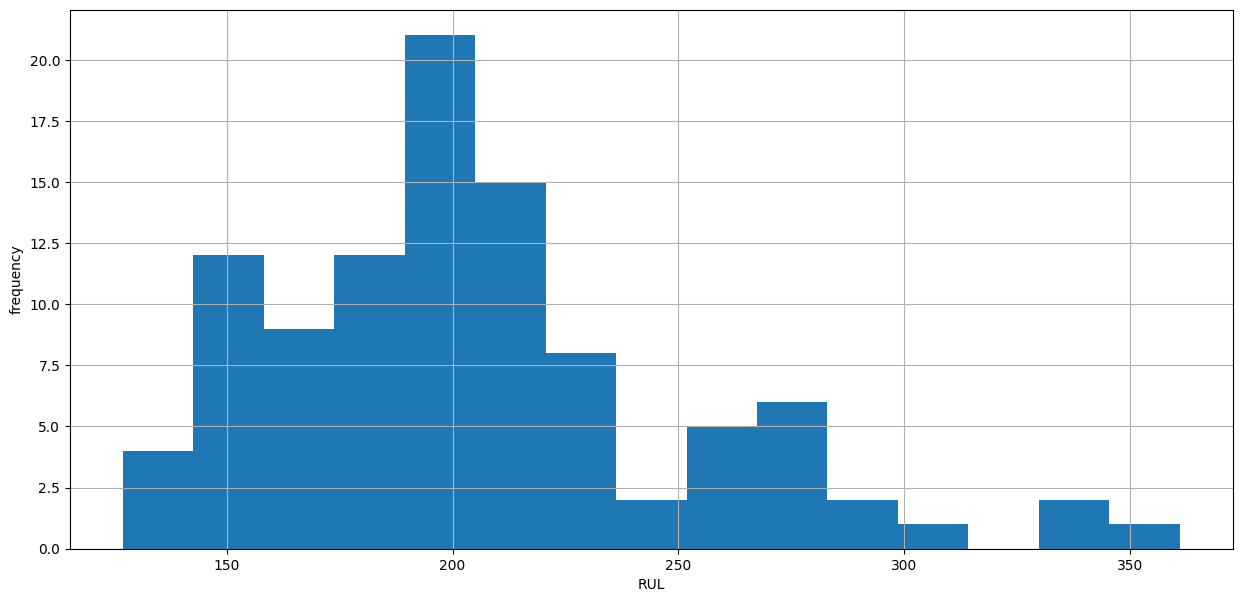

In [38]:
df_max_rul = train[['engine', 'RUL']].groupby('engine').max().reset_index()
df_max_rul['RUL'].hist(bins=15, figsize=(15,7))
plt.xlabel('RUL')
plt.ylabel('frequency')
plt.show()

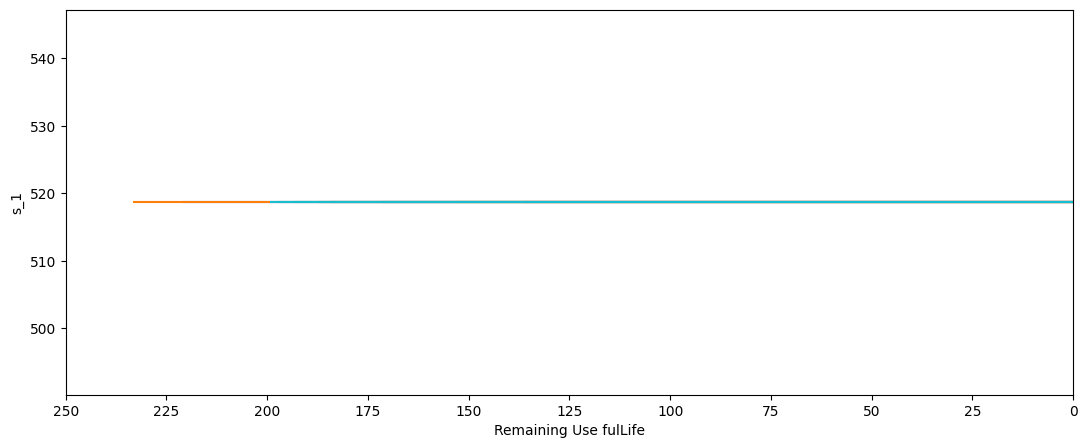

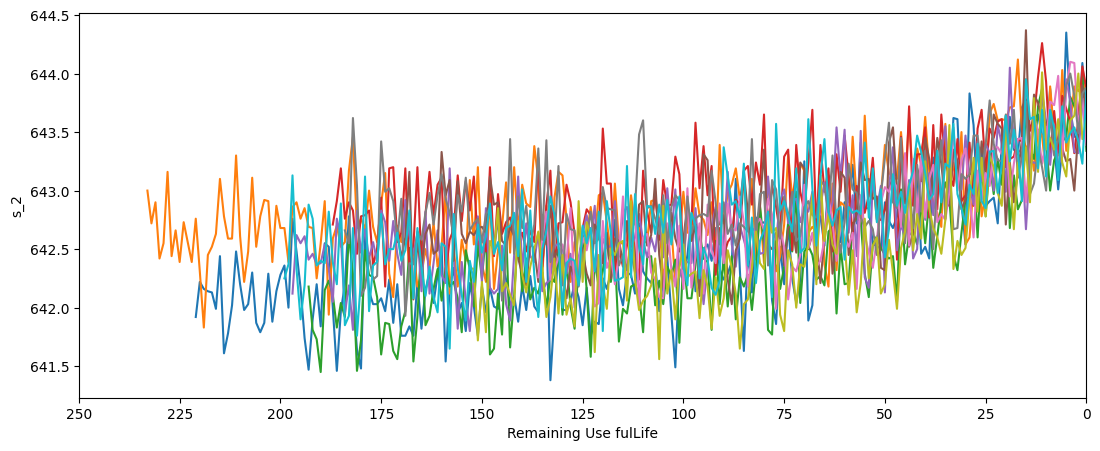

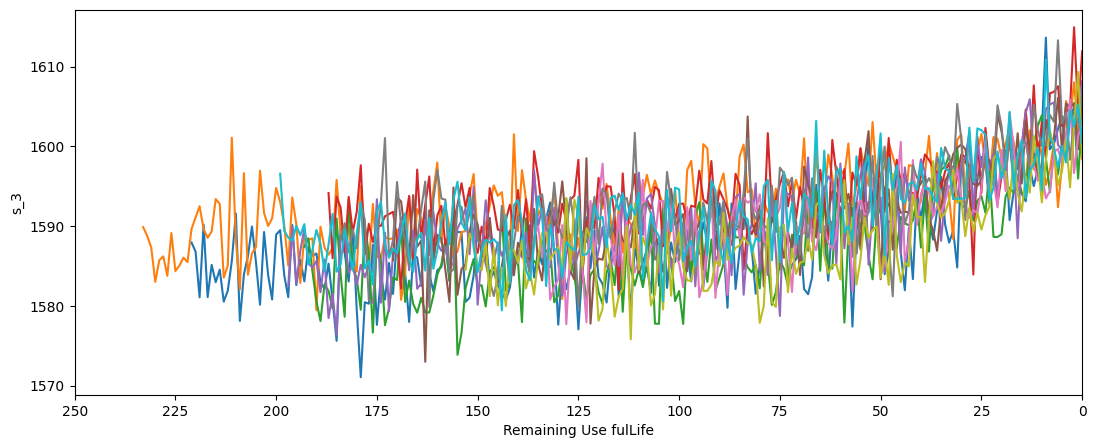

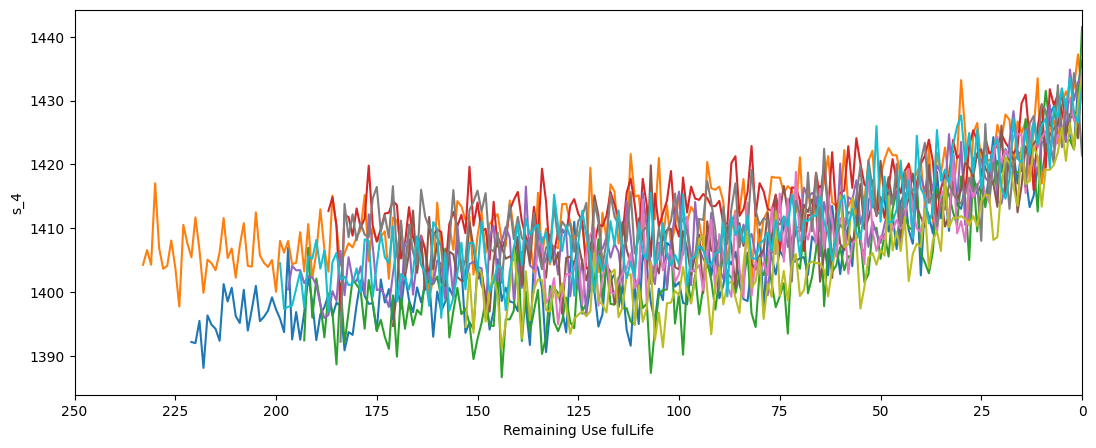

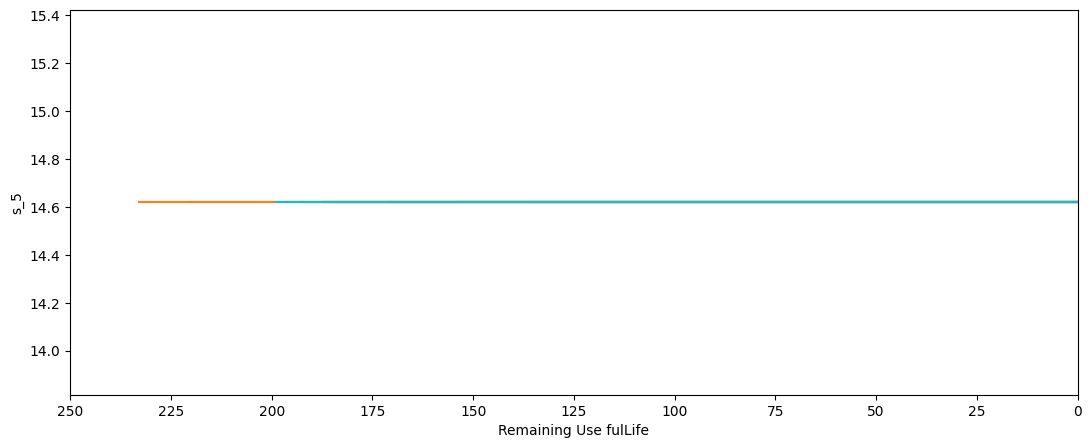

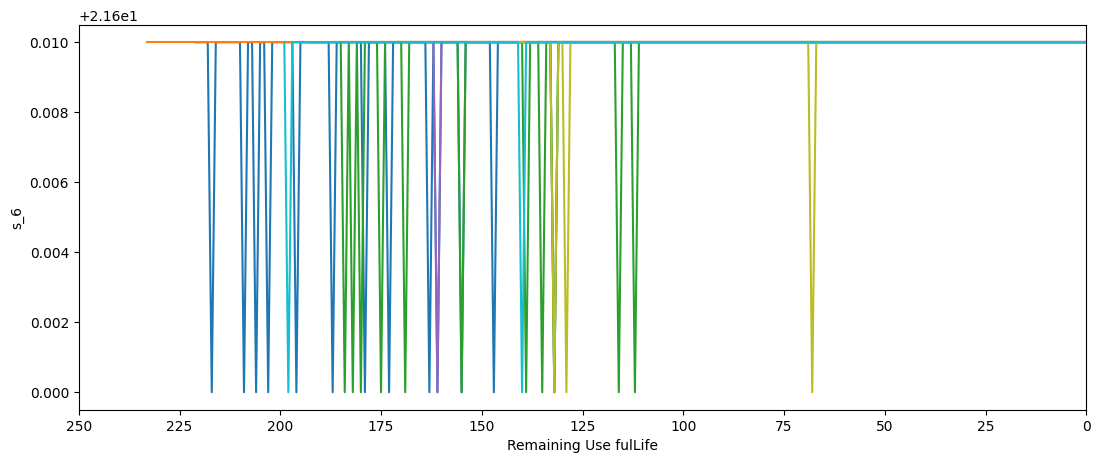

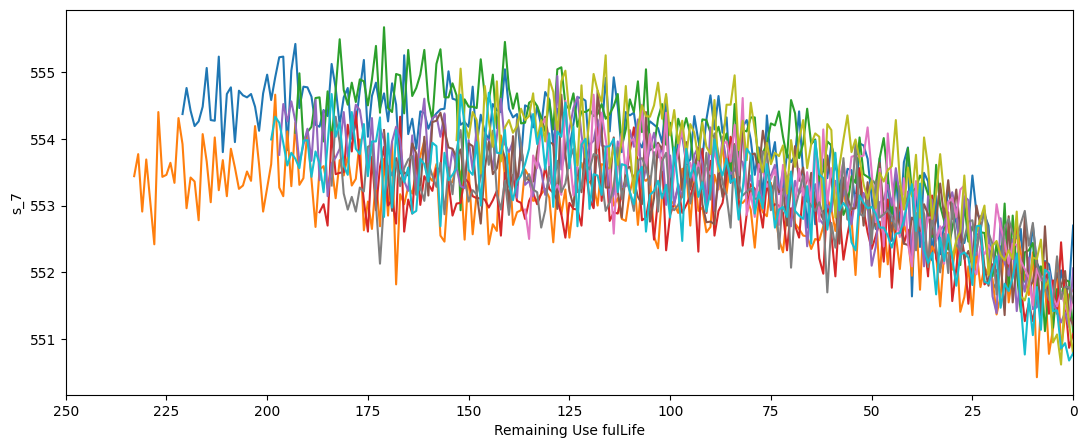

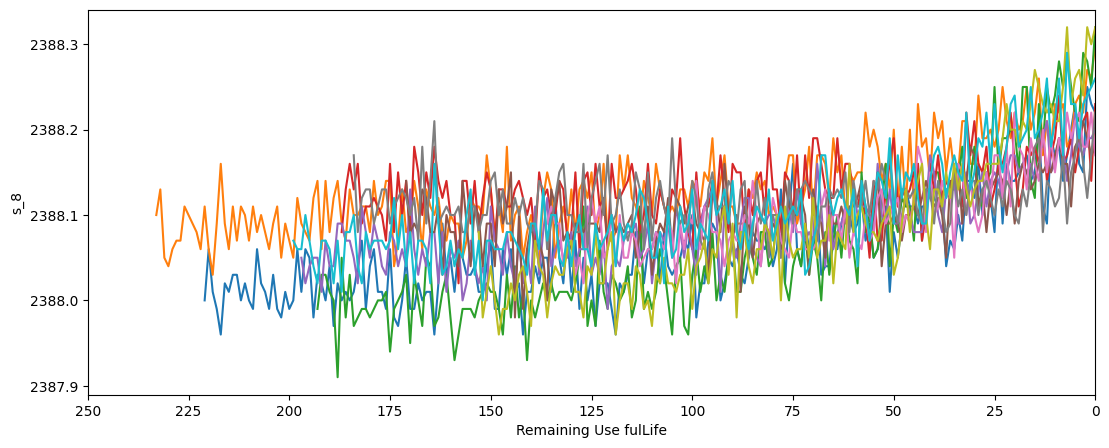

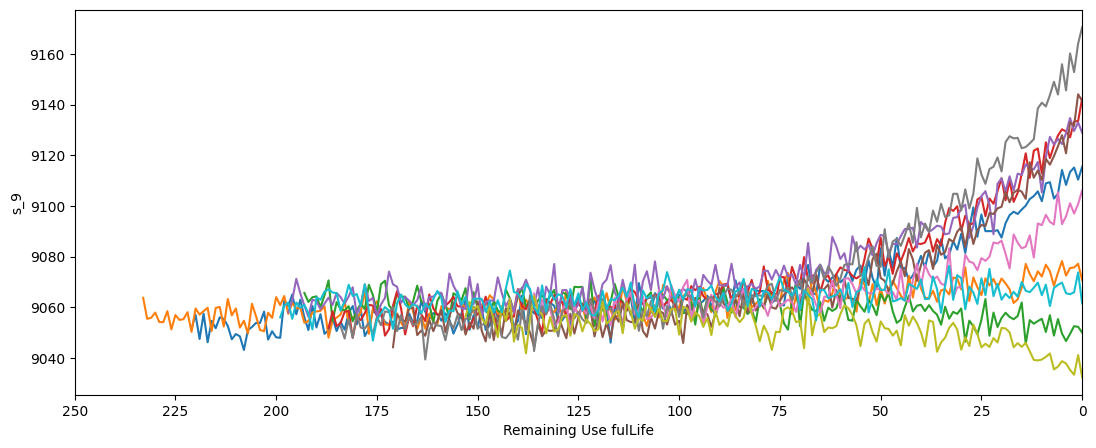

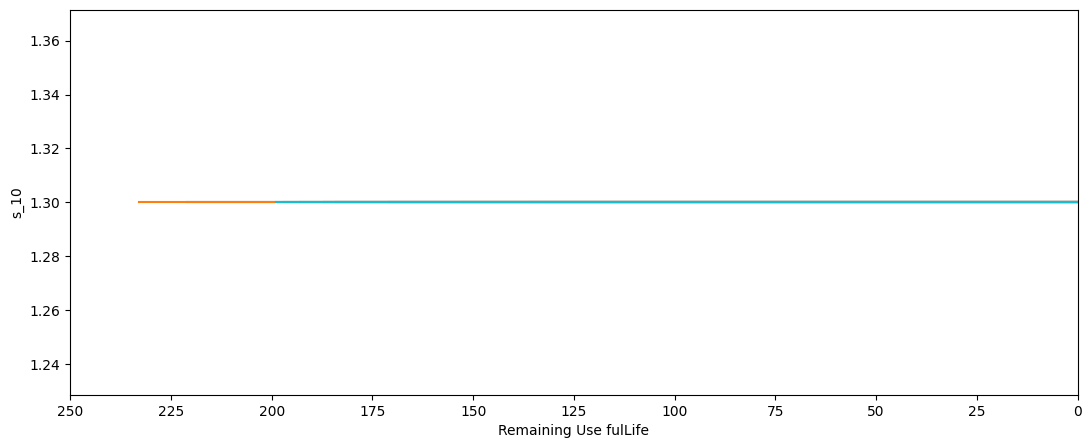

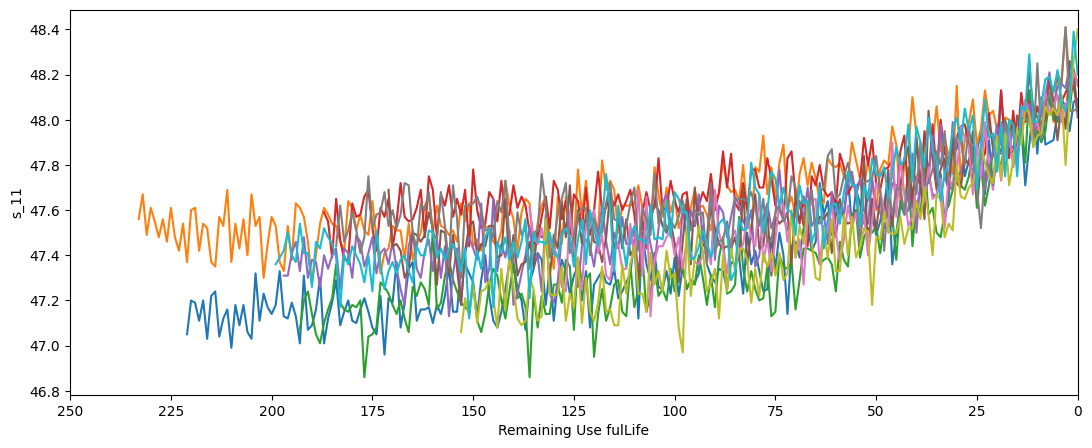

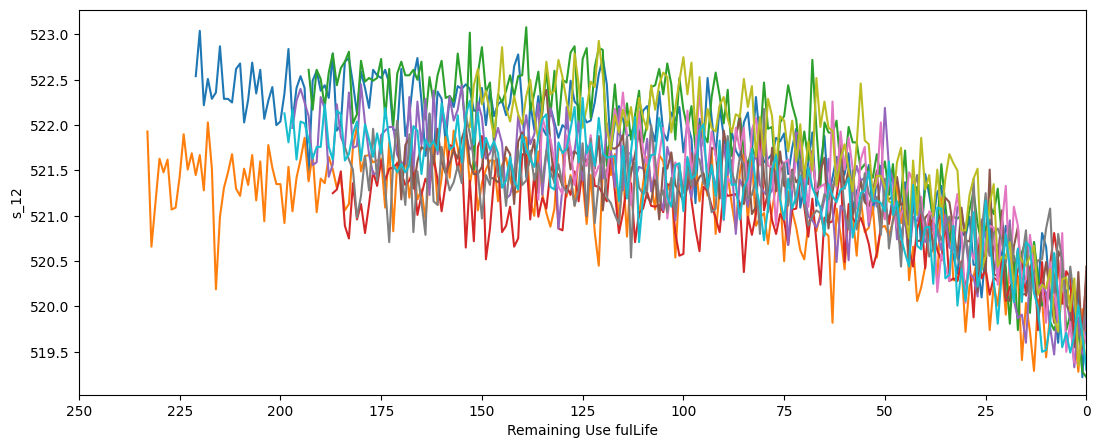

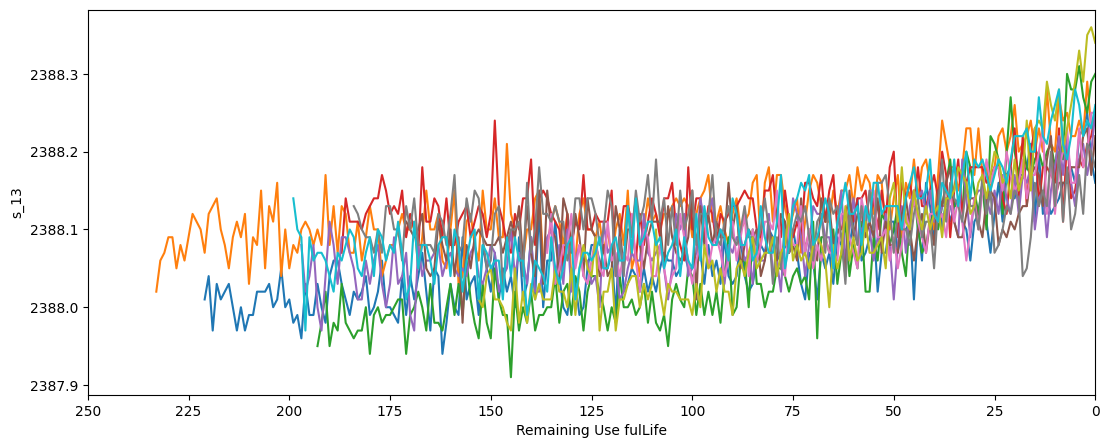

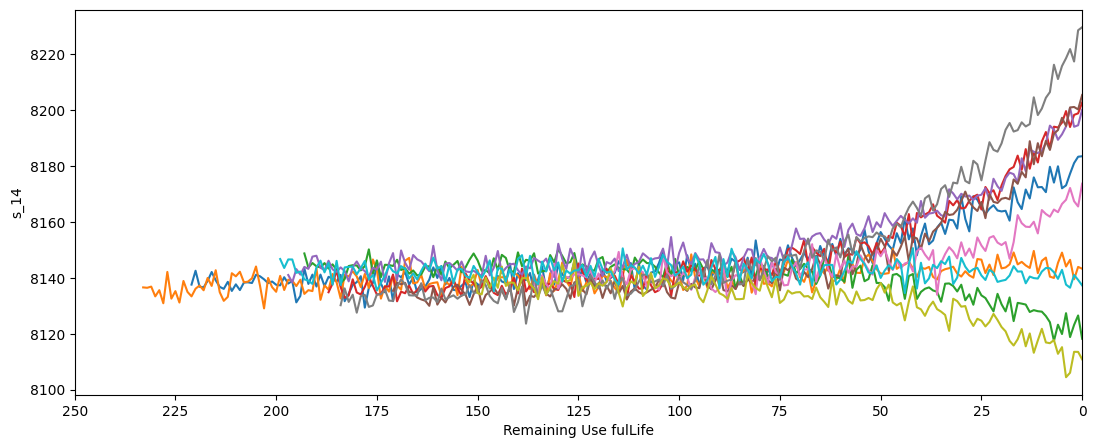

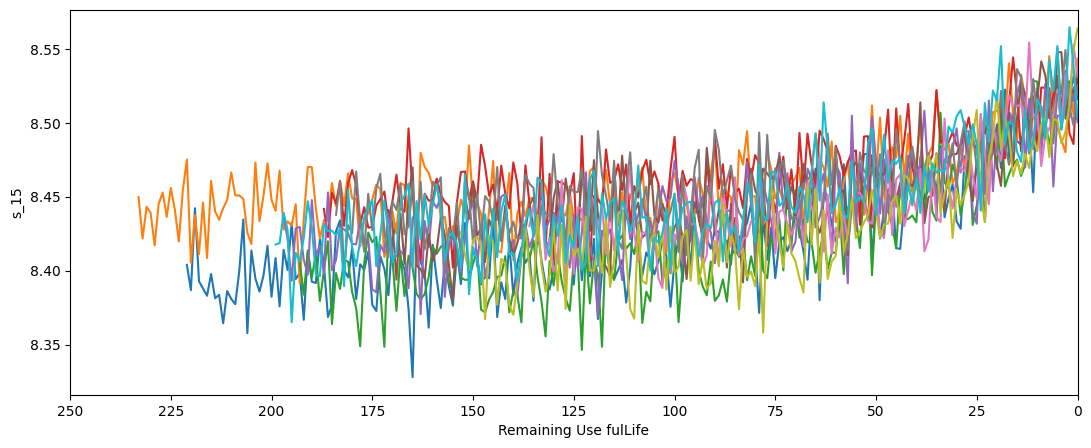

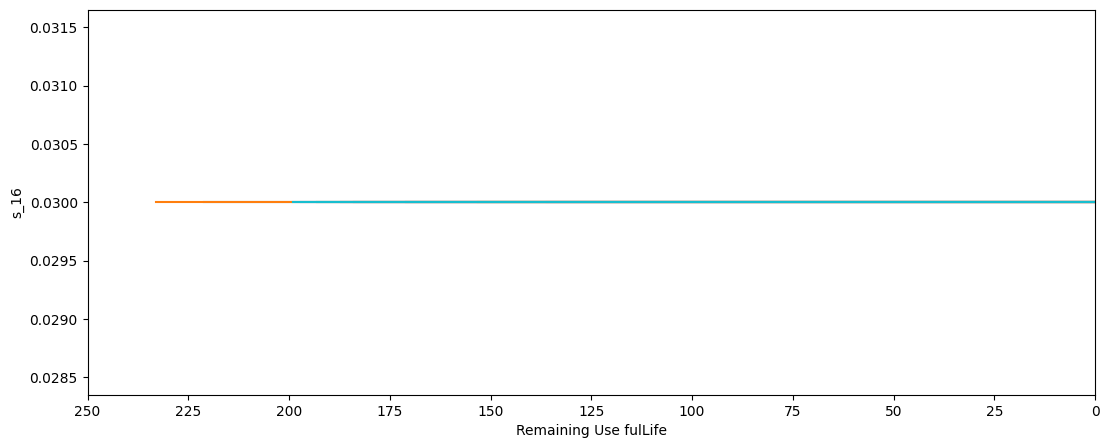

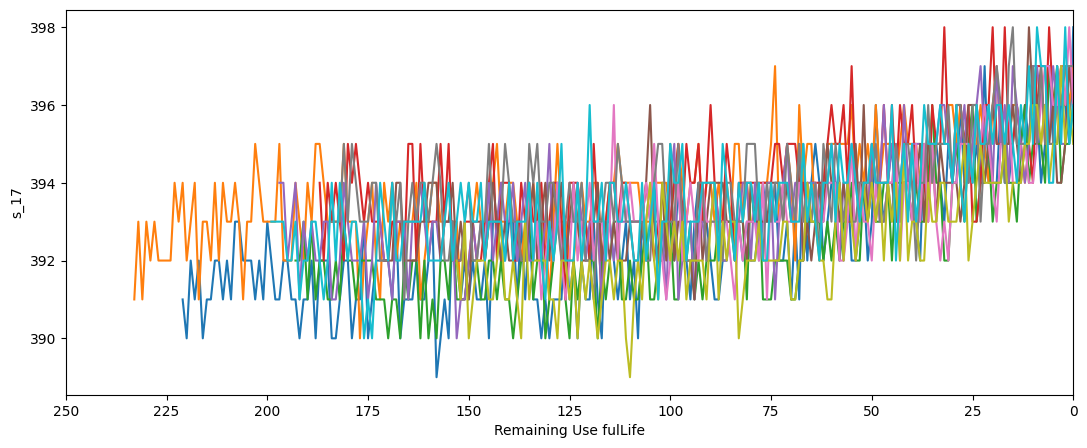

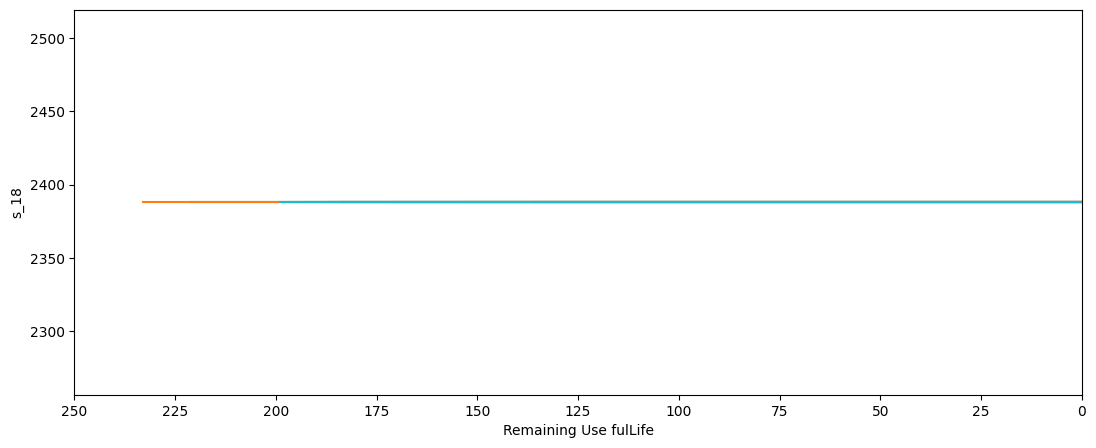

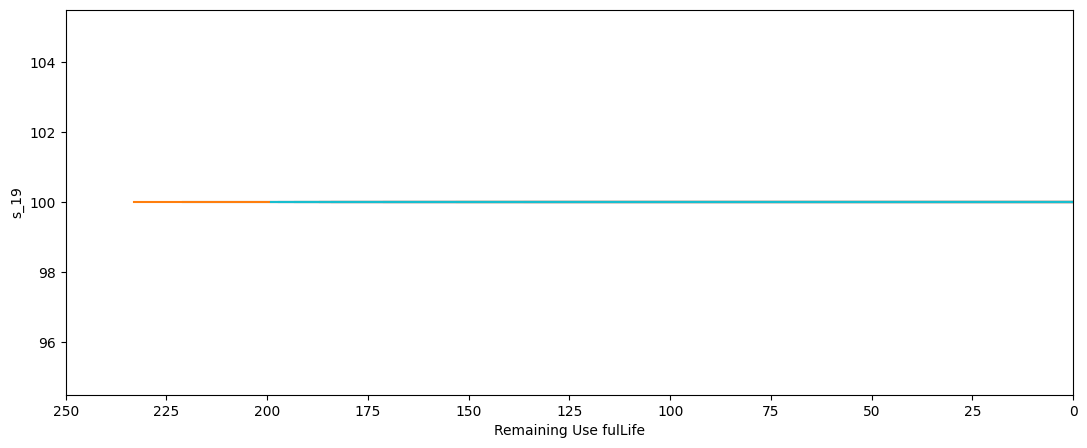

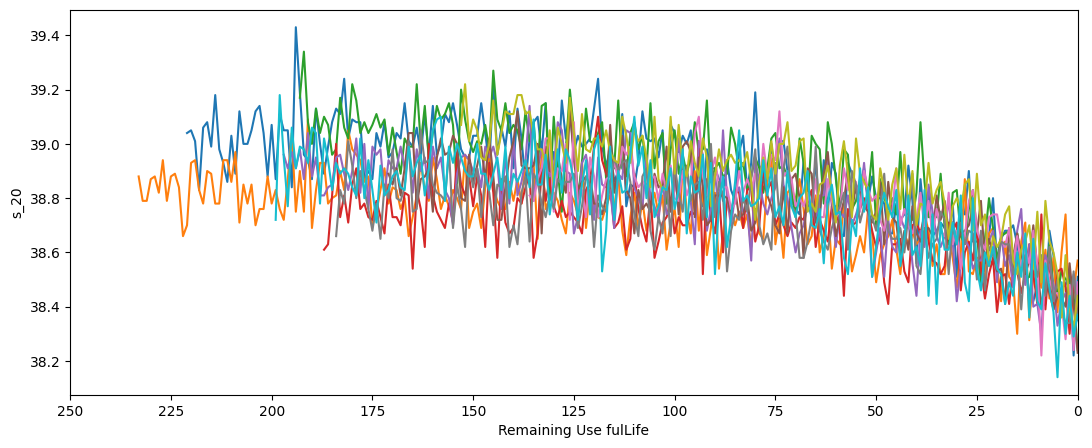

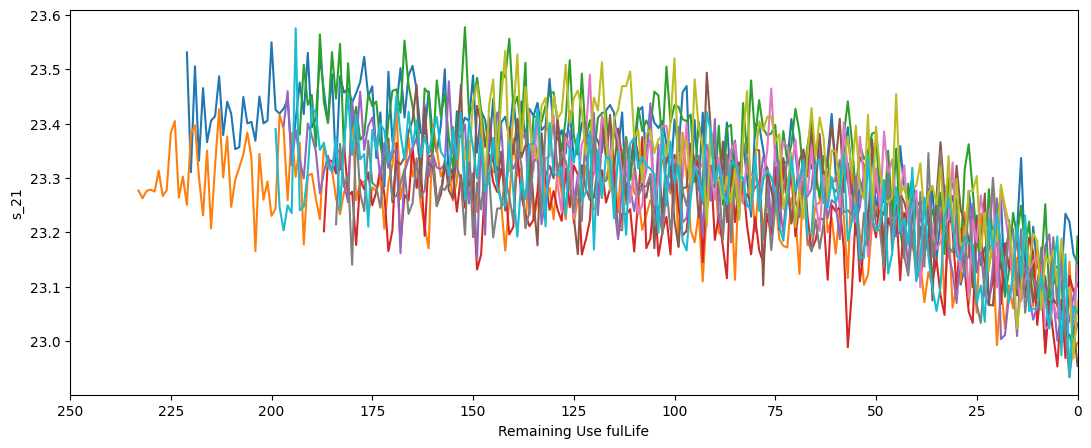

In [39]:
def plot_sensor(sensor_name):
    plt.figure(figsize=(13,5))
    for i in train['engine'].unique():
        if (i % 10 == 0):  # only plot every 10th engine
            plt.plot('RUL', sensor_name, 
                     data=train[train['engine']==i])
    plt.xlim(250, 0)  # reverse the x-axis so RUL counts down to zero
    plt.xticks(np.arange(0, 275, 25))
    plt.ylabel(sensor_name)
    plt.xlabel('Remaining Use fulLife')
    plt.show()
for sensor_name in sensor_names:
    plot_sensor(sensor_name)

In [ ]:
'''
We can observe sensors (Features or independent variables) have strong relation with the RUL (our dependent variable) in range of RUL from 125 to 0.

In order to ensure model perform better we will later clip all higher value of RUL(above 125) to 125.
'''

## Extraction of only Important Features which have string relation with RUL of the engine

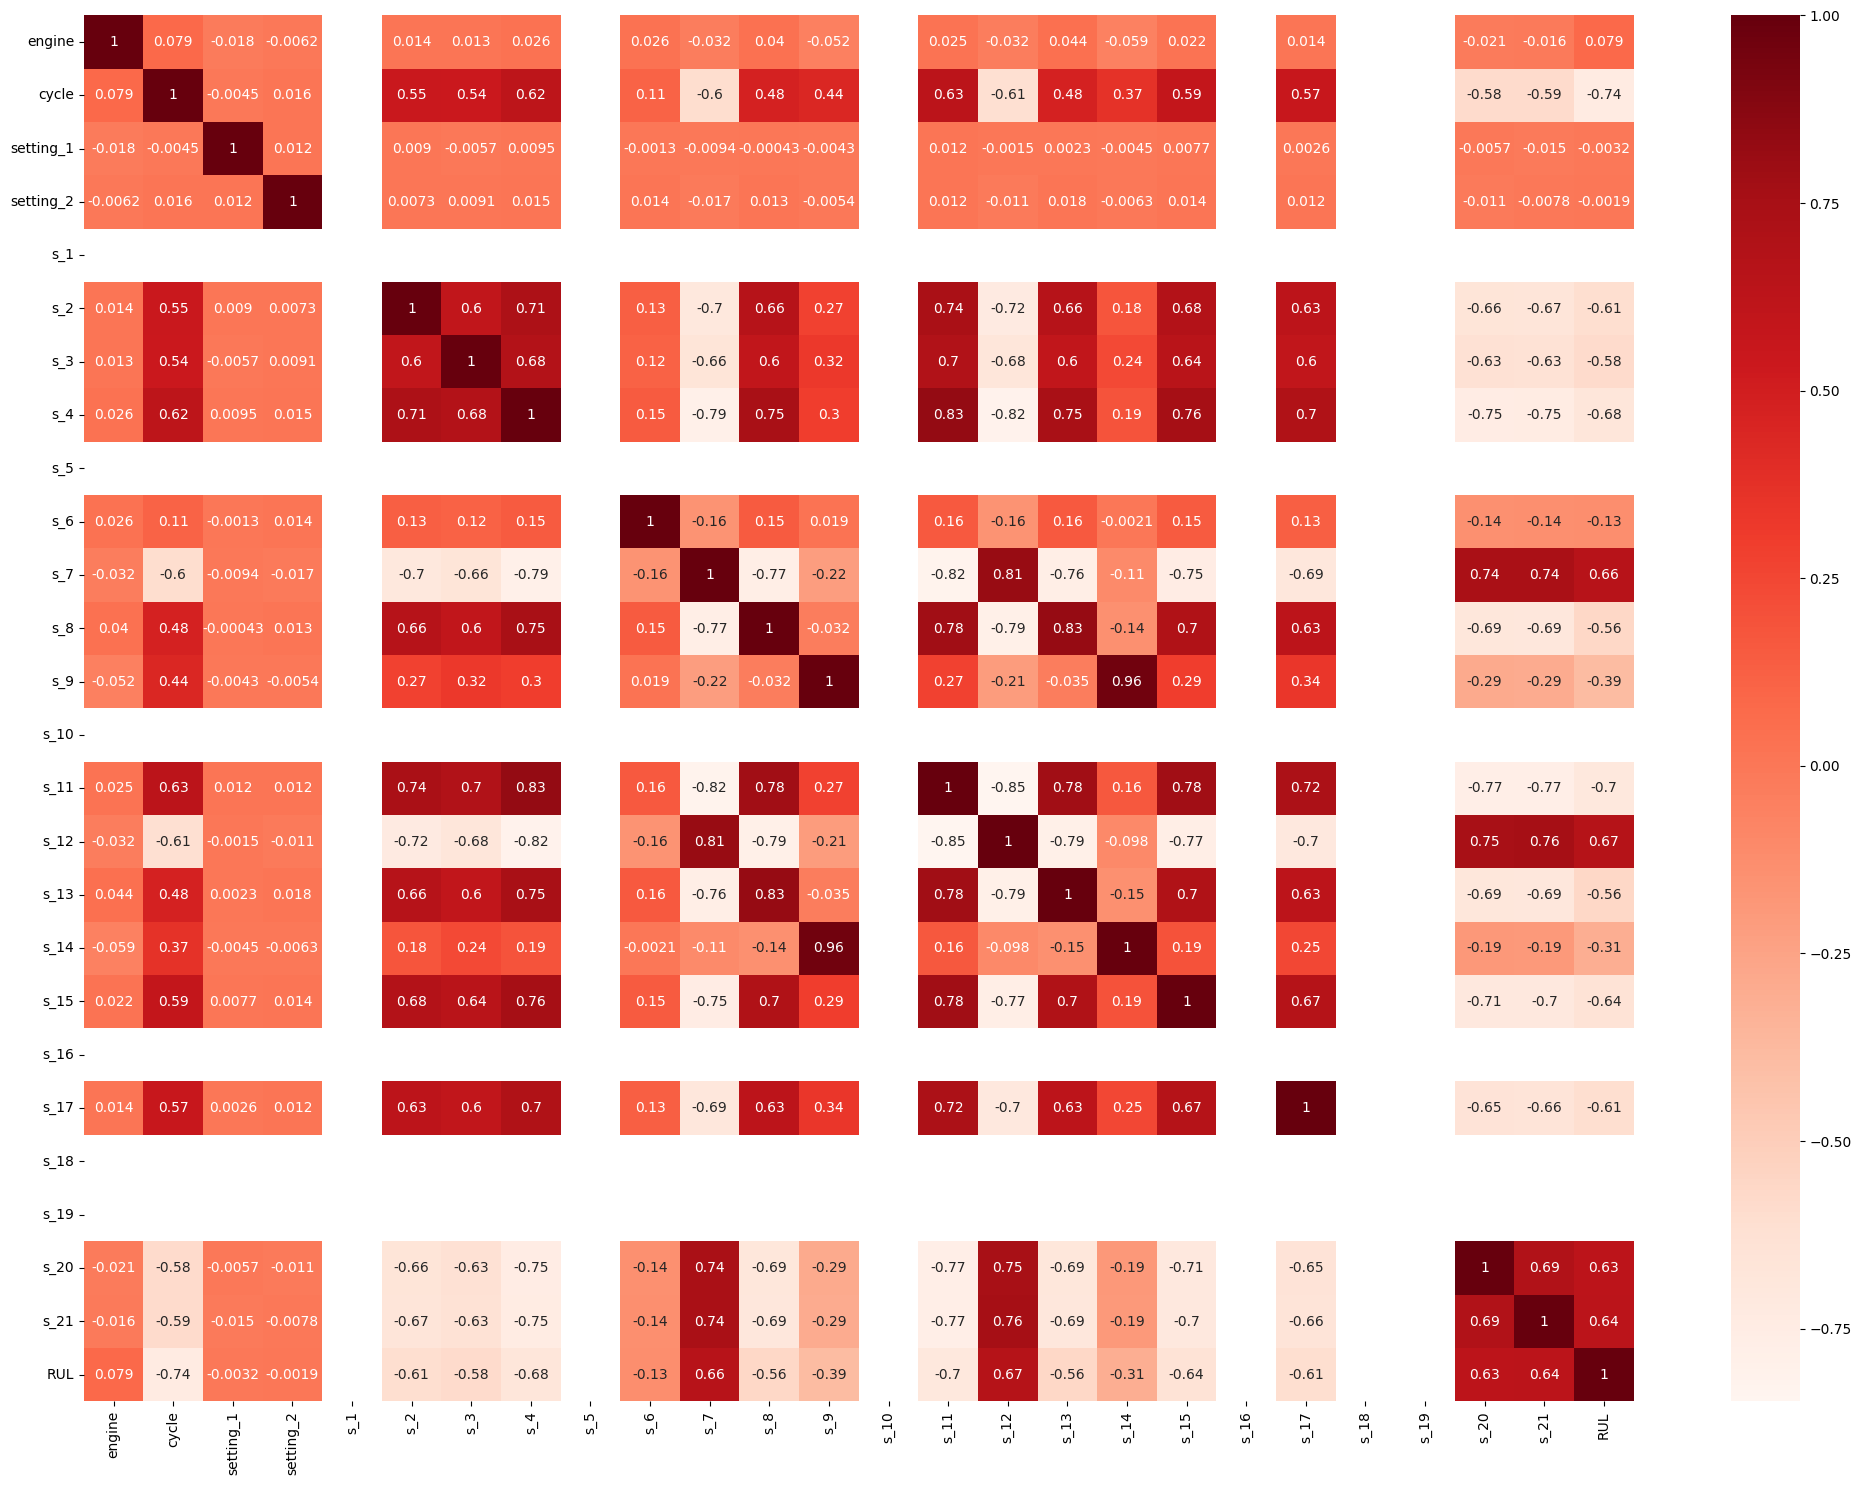

In [40]:
'''
This is done to select only important features for model building in order to avoid problem of “ Overfitting”.

First we will plot heat map to see correlation of features with RUL.
'''
plt.figure(figsize=(25,18))
sns.heatmap(train.corr(), annot=True,cmap='Reds')
plt.show()

In [41]:
cor = train.corr()
train_relevant_features = cor[abs(cor['RUL']) >= 0.5]
train_relevant_features['RUL']

cycle   -0.736241
s_2     -0.606484
s_3     -0.584520
s_4     -0.678948
s_7      0.657223
s_8     -0.563968
s_11    -0.696228
s_12     0.671983
s_13    -0.562569
s_15    -0.642667
s_17    -0.606154
s_20     0.629428
s_21     0.635662
RUL      1.000000
Name: RUL, dtype: float64

In [42]:
list_relevant_features = train_relevant_features.index
list_relevant_features = list_relevant_features[1:]
list_relevant_features

Index(['s_2', 's_3', 's_4', 's_7', 's_8', 's_11', 's_12', 's_13', 's_15',
       's_17', 's_20', 's_21', 'RUL'],
      dtype='object')

In [43]:
'''
Above list contains important features have correlation of magnitude greater and equal to 0.5 with our target variable RUL.

Now we will keep only those important features in both train & test dataset.
'''
train = train[list_relevant_features]

In [44]:
# Separating Train features and RUL (Target Variable) from Train Dataset
y_train = train['RUL']
train = train.drop(['RUL'],axis=1)
train.head()

s_2      s_3      s_4     s_7      s_8   s_11    s_12     s_13    s_15  \
0  641.82  1589.70  1400.60  554.36  2388.06  47.47  521.66  2388.02  8.4195   
1  642.15  1591.82  1403.14  553.75  2388.04  47.49  522.28  2388.07  8.4318   
2  642.35  1587.99  1404.20  554.26  2388.08  47.27  522.42  2388.03  8.4178   
3  642.35  1582.79  1401.87  554.45  2388.11  47.13  522.86  2388.08  8.3682   
4  642.37  1582.85  1406.22  554.00  2388.06  47.28  522.19  2388.04  8.4294   

   s_17   s_20     s_21  
0   392  39.06  23.4190  
1   392  39.00  23.4236  
2   390  38.95  23.3442  
3   392  38.88  23.3739  
4   393  38.90  23.4044

In [45]:
x_train = train

In [46]:
x_test = test[x_train.columns]
x_test.head()

s_2      s_3      s_4     s_7      s_8   s_11    s_12     s_13    s_15  \
0  642.58  1581.22  1398.91  554.42  2388.08  47.23  521.79  2388.06  8.4024   
1  642.55  1586.59  1410.83  553.52  2388.10  47.67  521.74  2388.09  8.4505   
2  642.88  1589.75  1418.89  552.59  2388.16  47.88  520.83  2388.14  8.4119   
3  642.78  1594.53  1406.88  552.64  2388.13  47.65  521.88  2388.11  8.4634   
4  642.27  1589.94  1419.36  553.29  2388.10  47.46  521.00  2388.15  8.4362   

   s_17   s_20     s_21  
0   393  38.81  23.3552  
1   391  38.81  23.2618  
2   395  38.93  23.2740  
3   395  38.58  23.2581  
4   394  38.75  23.4117

In [47]:
# Clipping of RUL at 125 as after 125 , RUL is responding to the sensor values after this value. This is done to improve performance of the applied models.
y_train = y_train.clip(upper=125)

## Building Model

In [48]:
# first create an evaluate function
from sklearn.metrics import mean_squared_error, r2_score
def evaluate(y_true, y_hat, label='test'):
    mse = mean_squared_error(y_true, y_hat)
    rmse = np.sqrt(mse)
    variance = r2_score(y_true, y_hat)
    print('{} set RMSE:{}, R2:{}'.format(label, rmse, variance))
    return rmse,variance;

In [49]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train1 = sc.fit_transform(x_train)
x_test1 = sc.fit_transform(x_test)

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [24]:
params = {
    'max_depth':[1,2,5,10,20],
    'min_samples_leaf':[5,10,20,50,100],
    'max_features':[2,3,4,5,6],
    'n_estimators':[10,30,50,100]
}
rf = RandomForestRegressor(random_state=42,n_jobs=-1)
grid_search = GridSearchCV(rf, params, cv=4, n_jobs=-1, verbose=1)

grid_search.fit(x_train1,y_train)

Fitting 4 folds for each of 500 candidates, totalling 2000 fits


GridSearchCV(cv=4, estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 5, 10, 20],
                         'max_features': [2, 3, 4, 5, 6],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 30, 50, 100]},
             verbose=1)

In [25]:
rf_best = grid_search.best_estimator_
y_hat_train = rf_best.predict(x_train1)
# Evaluating on Train Data Set
RMSE_Train,R2_Train=evaluate(y_train, y_hat_train, 'train')
# Evaluating on Test Data Set
y_hat_test1 = rf_best.predict(x_test1)
RMSE_Test,R2_Test=evaluate(y_test, y_hat_test1)

train set RMSE:15.60580896281151, R2:0.8597607677845216
test set RMSE:22.081123293731853, R2:0.7176532577138497


In [26]:
x_test1[0]
rf_best.predict([[ 1.35927635, -0.56149466, -0.97567424,  0.20913759, -0.53907794,
       -1.10359065, -0.04954158, -0.72059021, -0.71165923, -0.46340588,
       -0.22940849,  0.44886618]])

array([106.6077351])

In [29]:
import sklearn
print("numpy", np.__version__)
print("pandas", pd.__version__)
print("sklearn", sklearn.__version__)

numpy 2.2.3
pandas 2.2.3
sklearn 1.6.1


In [30]:
import pickle

In [32]:
with open(r'C:\Users\HP\Desktop\_\Machine Learning\Predictive Maintanance System\data\predictive_maintenance_dataset.csv\model.pkl', 'wb') as file:
    pickle.dump(rf_best, file)

In [33]:
x_train1.shape

(20631, 12)

In [25]:
x_test1.shape

(100, 13)

In [50]:
x_test

s_2      s_3      s_4     s_7      s_8   s_11    s_12     s_13    s_15  \
0   642.58  1581.22  1398.91  554.42  2388.08  47.23  521.79  2388.06  8.4024   
1   642.55  1586.59  1410.83  553.52  2388.10  47.67  521.74  2388.09  8.4505   
2   642.88  1589.75  1418.89  552.59  2388.16  47.88  520.83  2388.14  8.4119   
3   642.78  1594.53  1406.88  552.64  2388.13  47.65  521.88  2388.11  8.4634   
4   642.27  1589.94  1419.36  553.29  2388.10  47.46  521.00  2388.15  8.4362   
..     ...      ...      ...     ...      ...    ...     ...      ...     ...   
95  642.30  1590.88  1397.94  553.99  2388.03  47.14  522.30  2388.01  8.4110   
96  642.59  1582.96  1410.92  554.05  2388.06  47.38  521.58  2388.06  8.4500   
97  642.68  1599.51  1415.47  553.44  2388.13  47.66  521.53  2388.09  8.4235   
98  642.00  1585.03  1397.98  554.75  2388.01  47.26  521.82  2388.02  8.4003   
99  642.95  1601.62  1424.99  552.48  2388.06  47.80  521.07  2388.05  8.4903   

    s_17   s_20     s_21  
0    393  38.81  23.3552  
1    391  38.81  23.2618  
2    395  38.93  23.2740  
3    395  38.58  23.2581  
4    394  38.75  23.4117  
..   ...    ...      ...  
95   391  38.96  23.4606  
96   395  38.61  23.2953  
97   394  38.76  23.3608  
98   391  38.95  23.3595  
99   396  38.70  23.1855  

[100 rows x 12 columns]

In [51]:
y_test

RUL
0   112
1    98
2    69
3    82
4    91
..  ...
95  137
96   82
97   59
98  117
99   20

[100 rows x 1 columns]

In [54]:
x_test1

array([[-0.42589412, -1.60361949, -1.35594304, ..., -0.35633159,
         0.29127388,  0.99419777],
       [-0.49371165, -0.79157986,  0.03283195, ..., -1.7268377 ,
         0.29127388,  0.02174993],
       [ 0.25228123, -0.31373159,  0.97188617, ...,  1.01417452,
         1.06456736,  0.14877203],
       ...,
       [-0.19983567,  1.16215422,  0.57342892, ...,  0.32892147,
        -0.03093174,  1.052503  ],
       [-1.73703312, -1.02747964, -1.46429545, ..., -1.7268377 ,
         1.1934496 ,  1.03896785],
       [ 0.41052214,  1.48122379,  1.68258478, ...,  1.69942758,
        -0.41757848, -0.77265874]], shape=(100, 12))

In [57]:
cols = ["sensor_1","sensor_2","sensor_3","sensor_4","sensor_5","sensor_6","sensor_7","sensor_8","sensor_9","sensor_10","sensor_11","sensor_12"]
x_test1_temp = pd.DataFrame(x_test1, columns=cols)

z = pd.concat([x_test1_temp, y_test.reset_index(drop=True)], axis=1)

In [58]:
z

sensor_1  sensor_2  sensor_3  sensor_4  sensor_5  sensor_6  sensor_7  \
0  -0.425894 -1.603619 -1.355943  1.451228 -0.607375 -1.427840  0.739155   
1  -0.493712 -0.791580  0.032832  0.423689 -0.296697  0.292920  0.667113   
2   0.252281 -0.313732  0.971886 -0.638102  0.635336  1.114192 -0.644059   
3   0.026223  0.409090 -0.427375 -0.581016  0.169319  0.214704  0.868832   
4  -1.126675 -0.285000  1.026645  0.161095 -0.296697 -0.528352 -0.399115   
..       ...       ...       ...       ...       ...       ...       ...   
95 -1.058858 -0.142855 -1.468956  0.960293 -1.384069 -1.779813  1.473988   
96 -0.403288 -1.340501  0.043318  1.028795 -0.918053 -0.841217  0.436577   
97 -0.199836  1.162154  0.573429  0.332352  0.169319  0.253812  0.364535   
98 -1.737033 -1.027480 -1.464295  1.827992 -1.694747 -1.310515  0.782381   
99  0.410522  1.481224  1.682585 -0.763690 -0.918053  0.801327 -0.298256   

    sensor_8  sensor_9  sensor_10  sensor_11  sensor_12  RUL  
0  -0.842309 -1.537896  -0.356332   0.291274   0.994198  112  
1  -0.401310 -0.071375  -1.726838   0.291274   0.021750   98  
2   0.333690 -1.248251   1.014175   1.064567   0.148772   69  
3  -0.107310  0.321934   1.014175  -1.190872  -0.016773   82  
4   0.480690 -0.507368   0.328921  -0.095373   1.582456   91  
..       ...       ...        ...        ...        ...  ...  
95 -1.577309 -1.275691  -1.726838   1.257891   2.091585  137  
96 -0.842309 -0.086619   1.014175  -0.997549   0.370540   82  
97 -0.401310 -0.894578   0.328921  -0.030932   1.052503   59  
98 -1.430309 -1.601923  -1.726838   1.193450   1.038968  117  
99 -0.989309  1.142088   1.699428  -0.417578  -0.772659   20  

[100 rows x 13 columns]

In [59]:
z.to_excel(r"C:\Users\HP\Desktop\render-demo\scaled_data.xlsx", index=False)